In [6]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5')
orbit2 = read_h5('OrbitKS_L26p427_T80p246.h5')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5')

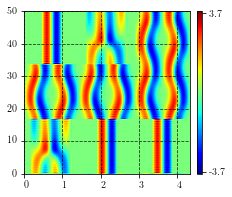

In [8]:
comoving=False
if comoving:
    # padded merger Orbit in comoving frame
    merger = read_h5('OrbitKS_merger.h5', directory='../data/tiles/')
else:
    # padded merger orbit in physical frame.
    merger =read_h5('OrbitKS_merger_fdomain.h5', directory='../data/tiles/')

# padded streak orbit
streak = read_h5('OrbitKS_streak.h5', directory='../data/tiles/')

# padded wiggle orbit
wiggle = read_h5('OrbitKS_wiggle.h5', directory='../data/tiles/')

td = {0 : streak, 1: merger, 2: wiggle}

symbol_array = np.array([[0, 1, 2], [2, 2, 2], [1, 0, 0]])

test = tile(symbol_array, td, OrbitKS)
test.plot()

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
orbit0 = rediscretize(orbit0, new_shape=(64, 64))

orbit1 = rediscretize(orbit1, new_shape=(64, 64))

orbit2 = rediscretize(orbit2, new_shape=(64, 64))

orbit3 = rediscretize(orbit3, new_shape=(64, 64))

In [ ]:
tile_dict = {0: orbit0, 1: orbit1, 2: orbit2, 3: orbit3}

In [ ]:
symbol_array = (4*np.random.rand(5,5)).astype(int)

In [ ]:
t0 = time.time()
orbit_persistence_test = rediscretize(orbit1, new_shape=(1024, 1024))
pcc, persistence = orbit_persistence(orbit_persistence_test)
gudhi_plot(persistence)
t1 = time.time()
print(t1-t0)

In [ ]:
pcc.persistent_betti_numbers()

In [ ]:
type(pcc)

In [ ]:
import gudhi

In [ ]:
type(persistence)

In [ ]:
orbit_persistence_test = rediscretize(orbit1, new_shape=(1024, 1024))
orbit_persistence_test2 = rediscretize(orbit2, new_shape=(1024, 1024))

pcc, persistence = orbit_persistence(orbit_persistence_test)
pcc2, persistence2 = orbit_persistence(orbit_persistence_test2)

In [ ]:
gudhi.hera.wasserstein_distance([p[-1] for p in persistence], [p[-1] for p in persistence2])

In [ ]:
?gudhi_plot

In [ ]:
gudhi_plot(persistence)